In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix

# Parte 1

,Mjet,C21,C22,D21,D22,Tau12,Label
0,83.1238,0.056322,0.007502,0.431626,0.122363,0.083797,1.0
1,114.0480,0.092756,0.016106,0.705808,0.146008,0.126179,0.0
2,40.1448,0.069905,0.009982,0.999098,0.572507,0.312938,0.0
3,21.6843,0.074390,0.019001,2.117070,3.688260,0.442132,0.0
4,17.7397,0.087399,0.029030,6.092850,11.110000,0.602503,0.0
...,...,...,...,...,...,...,...
9995,86.1754,0.127334,0.027613,0.968299,0.517874,0.407868,1.0
9996,94.1929,0.069918,0.012874,0.502973,0.181773,0.122527,1.0
9997,78.0869,0.079938,0.014323,0.605183,0.236965,0.194843,1.0
9998,14.6587,0.069615,0.014715,5.595860,9.113180,0.595198,0.0


,Mjet,C21,C22,D21,D22,Tau12,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,64.119075,0.116967,0.044424,1.999058,2.319157,0.326521,0.500000
std,35.144152,0.074923,0.062884,3.744427,6.453384,0.179834,0.500025
min,-0.000075,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.128550,0.066007,0.012932,0.879955,0.440453,0.186419,0.000000
50%,68.862650,0.104987,0.025958,1.298620,1.004905,0.317954,0.500000
75%,83.737700,0.153304,0.048320,2.016447,2.180223,0.464292,1.000000
max,248.591000,0.577043,0.880201,149.987000,279.142000,0.857832,1.000000


,Mjet,C21,C22,D21,D22,Tau12
Mjet,1.000000,0.639681,0.488897,-0.291517,-0.298242,0.019445
C21,0.639681,1.000000,0.863157,-0.032757,-0.062227,0.629523
C22,0.488897,0.863157,1.000000,-0.004772,-0.000450,0.463774
D21,-0.291517,-0.032757,-0.004772,1.000000,0.918022,0.194251
D22,-0.298242,-0.062227,-0.000450,0.918022,1.000000,0.171074
Tau12,0.019445,0.629523,0.463774,0.194251,0.171074,1.000000


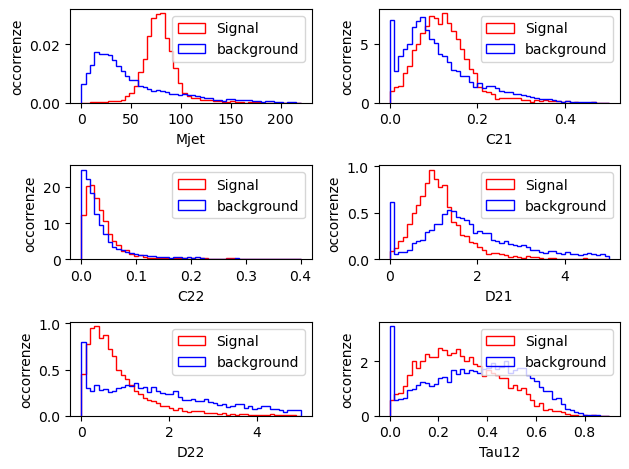

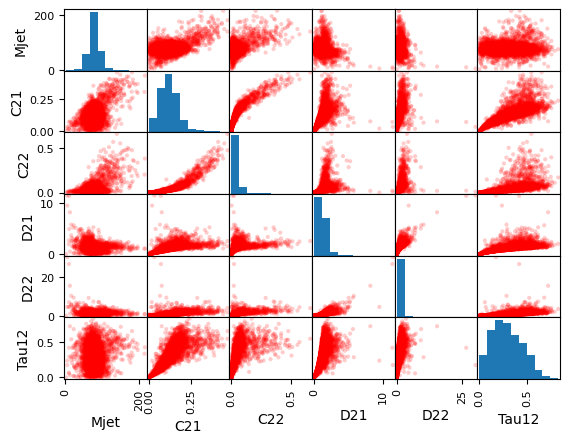

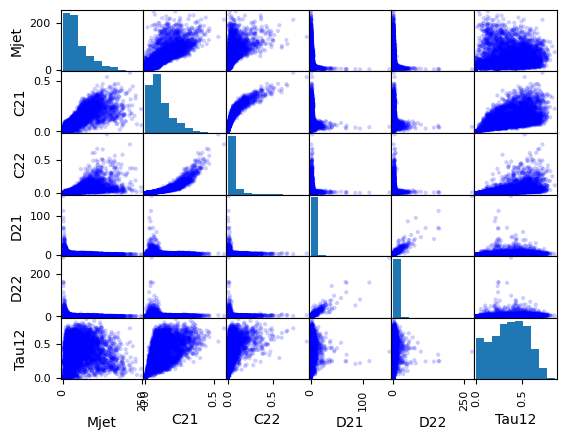

In [2]:
# importo il dataframe e lo assegno alla variabile df
df = pd.read_csv('JetSubStruct.csv', nrows=10000)
colonne = list(df.columns)
features = colonne[:-1]
display(df)
print()
# Fa una statistica descrittiva di tutte le colonne presenti del dataframe e la stampa
display(df.describe())
print()
display(df[features].corr())

#plt.hist( ,rwidth=0.8, color='red')
signal = df.loc[df['Label']>0.5]
background = df.loc[df['Label']<0.5]

mrange=[[0,220],[0,0.50],[0,0.40],[0,5],[0,5],[0,0.90]]

for i in range(6):
    plt.subplot(3,2,i+1)
    plt.hist(signal[features[i]], bins=50, range=mrange[i], color='red', histtype='step', density=True, label='Signal')
    plt.hist(background[features[i]], bins=50, range=mrange[i], color='blue', histtype='step', density=True, label='background')
    plt.xlabel(features[i])
    plt.ylabel('occorrenze')
    plt.legend()

plt.tight_layout()

_ = scatter_matrix(signal[features], color='red', alpha=0.2)
_ = scatter_matrix(background[features], color='blue', alpha=0.2)


# Parte 2

In [8]:
train=df[:8000].copy()
test=df[8000:].copy()

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

train_mean = train[features].mean()
train_std  = train[features].std()
train[features] = (train[features]-train_mean)/train_std
test[features] = (test[features]-train_mean)/train_std

#print(train_mean)
print("Media train:")
print(train[features].mean())
print()
print("deviazione standard train")
print(test[features].mean())
print()
print("media test:")
print(train[features].std())
print()
print("deviazione standard test:")
print(test[features].std())

,Mjet,C21,C22,D21,D22,Tau12,Label
0,83.1238,0.056322,0.007502,0.431626,0.122363,0.083797,1.0
5,82.2723,0.105332,0.026341,1.125780,0.627871,0.211182,1.0
7,74.0792,0.170328,0.133957,1.571930,2.770810,0.228347,1.0
8,66.9514,0.062922,0.010959,0.592396,0.241904,0.159842,1.0
11,75.7330,0.123727,0.027816,1.120090,0.727927,0.366568,1.0
...,...,...,...,...,...,...,...
9994,74.3421,0.158465,0.059245,1.678110,1.584090,0.525535,1.0
9995,86.1754,0.127334,0.027613,0.968299,0.517874,0.407868,1.0
9996,94.1929,0.069918,0.012874,0.502973,0.181773,0.122527,1.0
9997,78.0869,0.079938,0.014323,0.605183,0.236965,0.194843,1.0


# Parte 3

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model= GaussianNB()
model.fit(train[features],train['Label'])

target_train_pred=model.predict(train[features])
target_test_pred=model.predict(test[features])

acc_train=accuracy_score(train['Label'], target_train_pred)
acc_test=accuracy_score(test['Label'], target_test_pred)

print(acc_test, acc_train)


Media train:
Mjet    -9.103829e-18
C21      9.325873e-17
C22     -4.929390e-17
D21      2.664535e-17
D22     -1.776357e-17
Tau12    3.641532e-17
dtype: float64

deviazione standard train
Mjet     0.023269
C21      0.050244
C22      0.044609
D21      0.046586
D22      0.018407
Tau12    0.036254
dtype: float64

media test:
Mjet     1.0
C21      1.0
C22      1.0
D21      1.0
D22      1.0
Tau12    1.0
dtype: float64

deviazione standard test:
Mjet     0.996259
C21      1.028004
C22      1.112386
D21      1.564854
D22      1.300975
Tau12    0.990986
dtype: float64


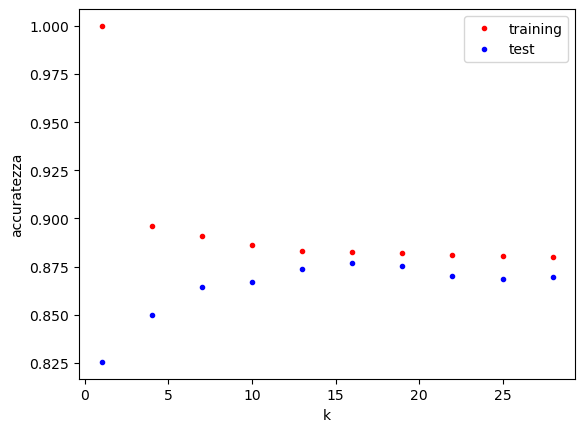

In [5]:
from sklearn.neighbors import KNeighborsClassifier

acc_train2=np.zeros([10])
acc_test2=np.zeros([10])
k=np.arange(1,30,3)

for i in range(10):
    model2 = KNeighborsClassifier(k[i])
    model2.fit(train[features],train['Label'])

    target_train_pred2=model2.predict(train[features])
    target_test_pred2=model2.predict(test[features])

    acc_train2[i]=accuracy_score(train['Label'], target_train_pred2)
    acc_test2[i]=accuracy_score(test['Label'], target_test_pred2)

plt.plot(k,acc_train2, 'r.', label='training')
plt.plot(k,acc_test2, 'b.', label='test')
plt.xlabel('k')
plt.ylabel('accuratezza')
plt.legend()

# Parte 4

In [14]:
from sklearn import neighbors

R=np.zeros([5])
var=features[1:]
target=features[0]
for i,k in enumerate(([1,5,10,20,100])):
    model3 = neighbors.KNeighborsRegressor(k)
    model3.fit(train[var],train[target])
    mjet_train=model3.predict(train[var])
    mjet_test=model3.predict(test[var])
    Stot=np.sum((train[target] - train[target].mean())**2)
    Sres=np.sum((test[target]-mjet_test)**2)
    R[i]=1 - Sres/Stot

    plt.subplot(4,2,2*i+1)
    plt.title('Training set k='+str(k))
    plt.scatter(train[target].values,mjet_train, s=0.1)
    plt.plot([-2,5],[-2,5], color='black', linewidth=1, linestyle='dashed')
    plt.ylabel('Mjet predetta')
    plt.xlabel('Mjet vera')

    plt.subplot(4,2,2*i+2)
    plt.title('Test set k='+str(k))
    plt.scatter(test[target].values, mjet_test, s=0.1)
    plt.plot([-2,5],[-2,5], color='black', linewidth=1, linestyle='dashed')
    plt.ylabel('Mjet predetta')
    plt.xlabel('Mjet vera')
plt.tight_layout()

0.75 0.749


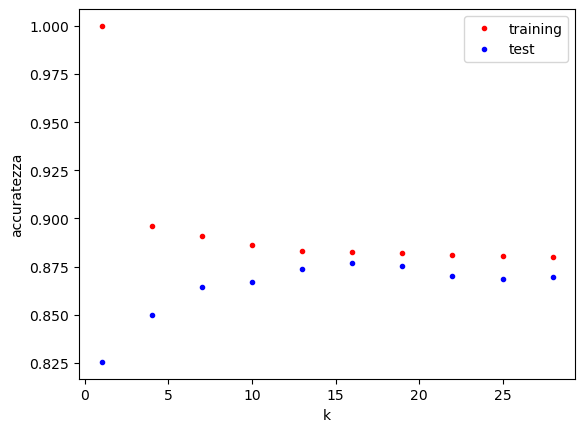

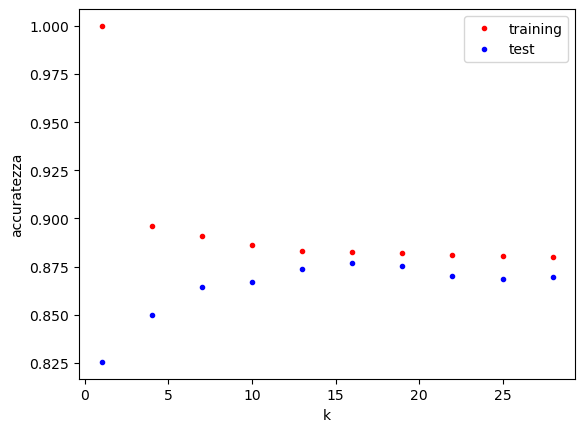